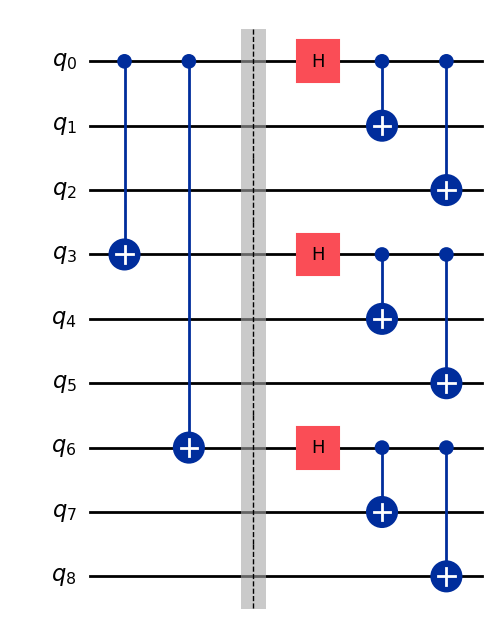

In [ ]:
from shor_code_package.shor_code import ShorCode, ShorCircuit
from qiskit.quantum_info import Operator, Statevector, StabilizerState
from qiskit import AncillaRegister, QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np



sc = ShorCode()
encoder = sc.encoder()
encoder.draw('mpl')

s = Statevector.from_label("0"*9)
s2 = s.evolve(Operator(encoder))
s2.draw('latex')

encoder.draw('mpl')

In [2]:
ghz = Statevector([1/np.sqrt(2),0,0,0,0,0,0,1/np.sqrt(2)])
target = ghz.copy() ^ ghz.copy() ^ ghz.copy()
target.is_valid()
target.draw('latex')

#qc = QuantumCircuit(9)
#qc.x(0)
#qc.compose(ShorCode().encoder(), inplace=True)
#qc.draw('mpl')
ghz.draw('latex')

<IPython.core.display.Latex object>

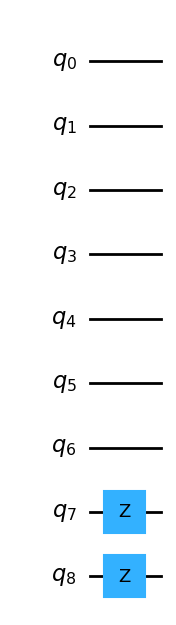

In [3]:
stabs = ShorCode().get_stabilizers()

stabs[7].draw('mpl')

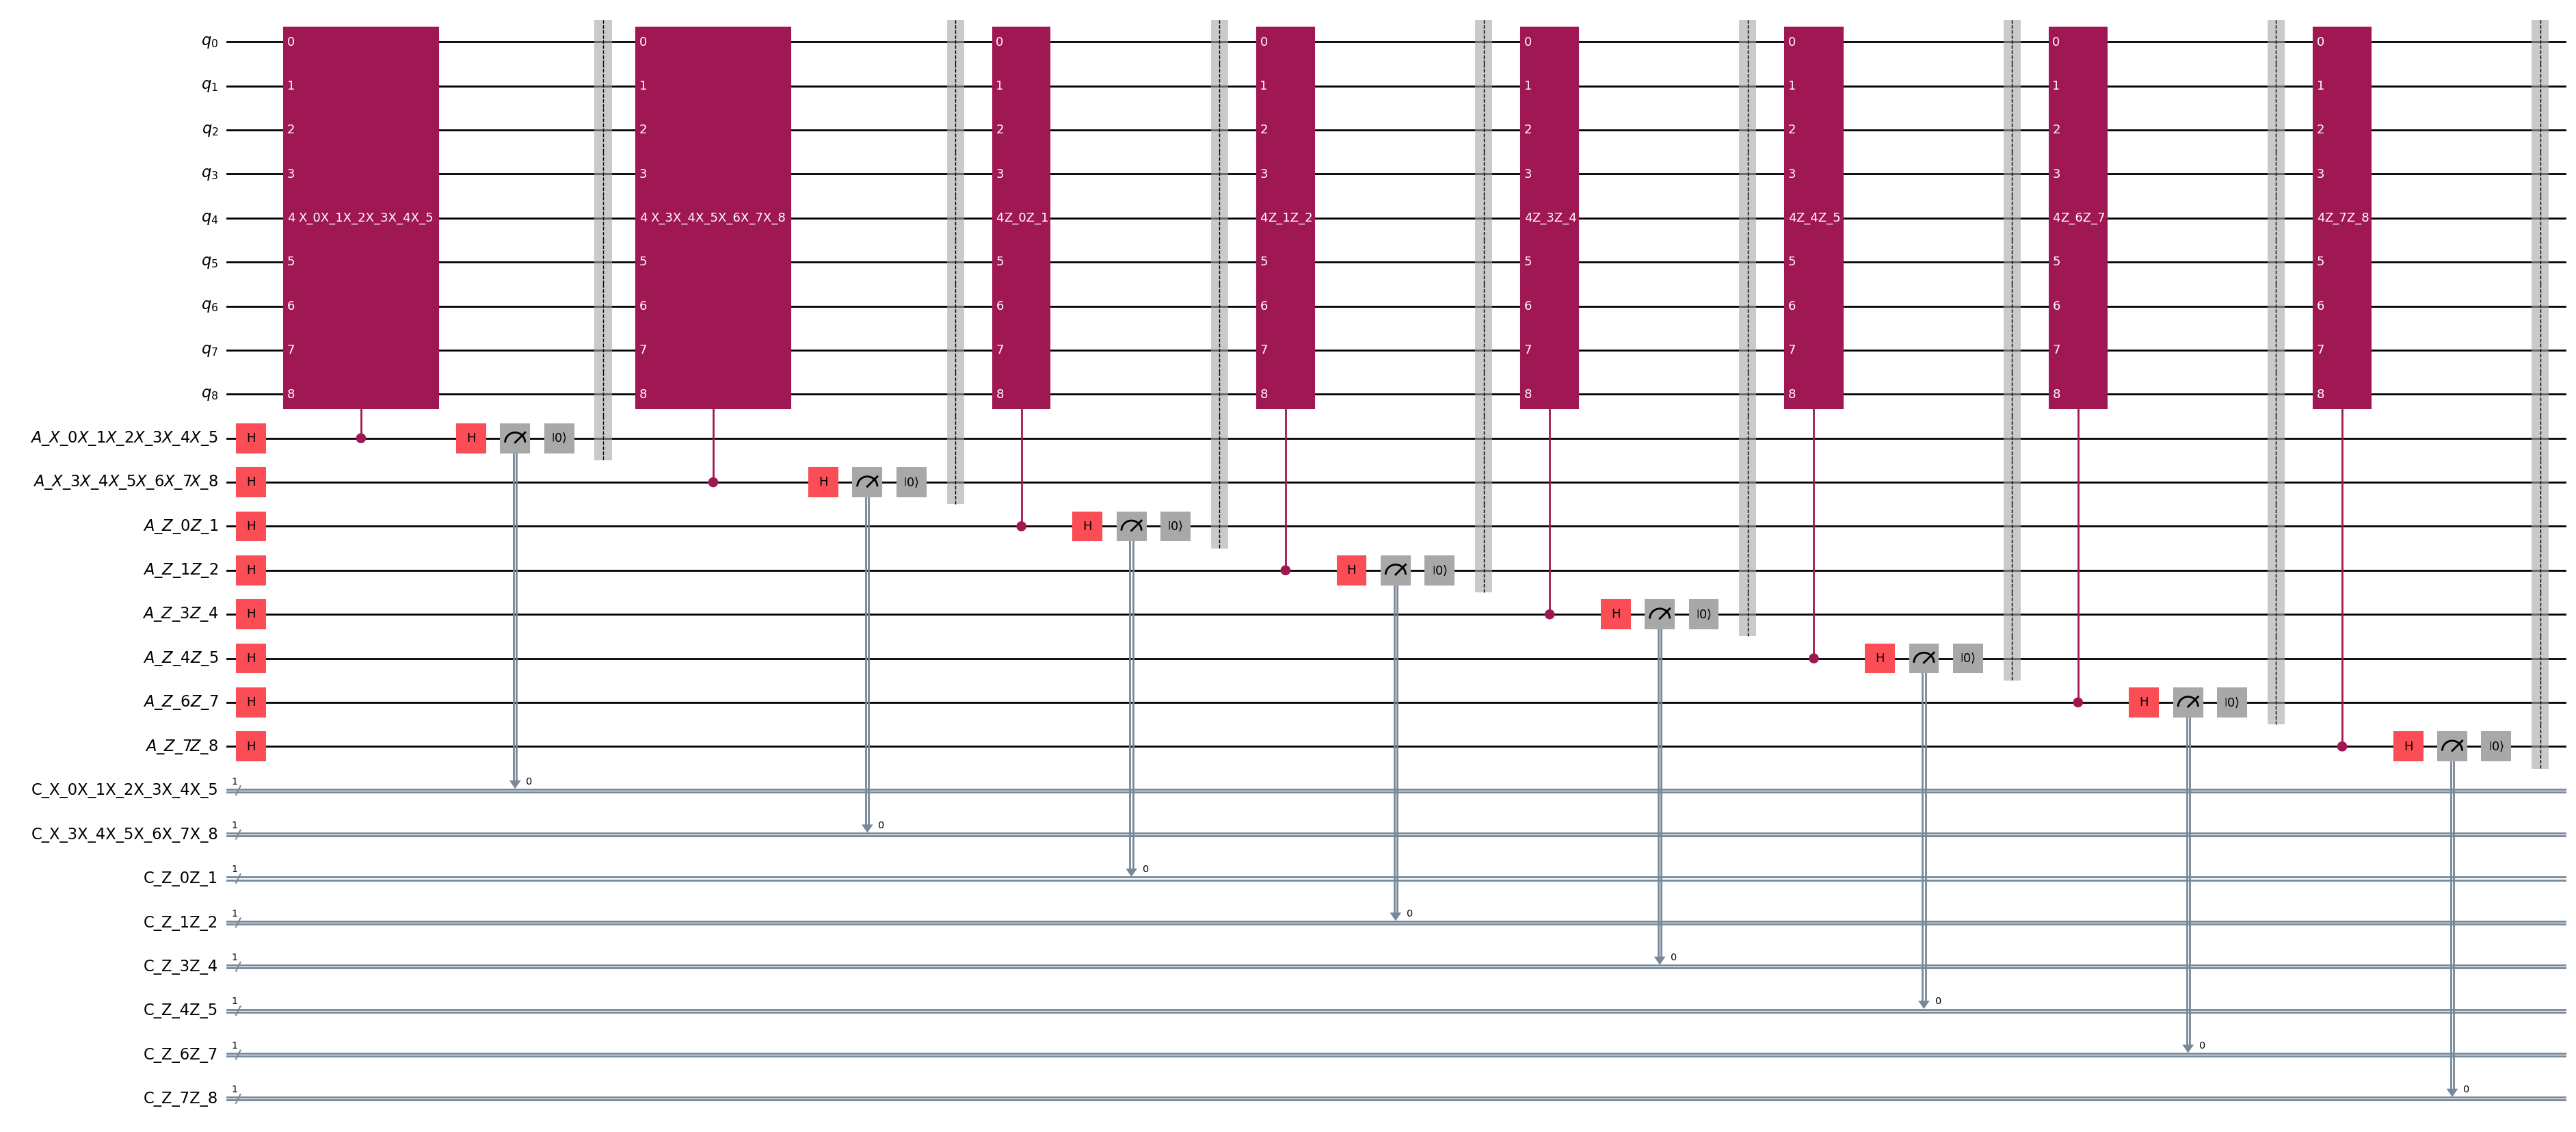

In [4]:
def stabilizer_measurement_circuit(self):
    """
    Return a QuantumCircuit measuring the stabilizers of the Shor code.
    
    Each stabilizer has eigenvalues +1 or -1, so Quantum Phase Estimation
    can be utilized with a single ancilla per stabilizer to get the
    measurement outcome of the stabilizer non-destructively.
    """
    #Initialize circuit
    stabilizers = self.get_stabilizers()
    qc = QuantumCircuit(9)
    #ancilla_register = AncillaRegister(len(stabilizers))
    #classical_register = ClassicalRegister(len(stabilizers))
    #qc.add_register(ancilla_register)
    #qc.add_register(classical_register)

    #Add phase estimation for each stabilizer
    for stabilizer in stabilizers:
        ar = AncillaRegister(1, name="A_"+stabilizer.name)
        cr = ClassicalRegister(1, name="C_"+stabilizer.name)
        qc.add_register(ar)
        qc.add_register(cr)
        
        cu = stabilizer.to_gate().control(1)
        qc.h(ar)
        qc.append(cu, [ar, *range(9)])
        qc.h(ar)
        qc.measure(ar, cr)
        qc.reset(ar)
        qc.barrier()

    return qc

qc = stabilizer_measurement_circuit(ShorCode())

qc.draw('mpl', fold=-1)

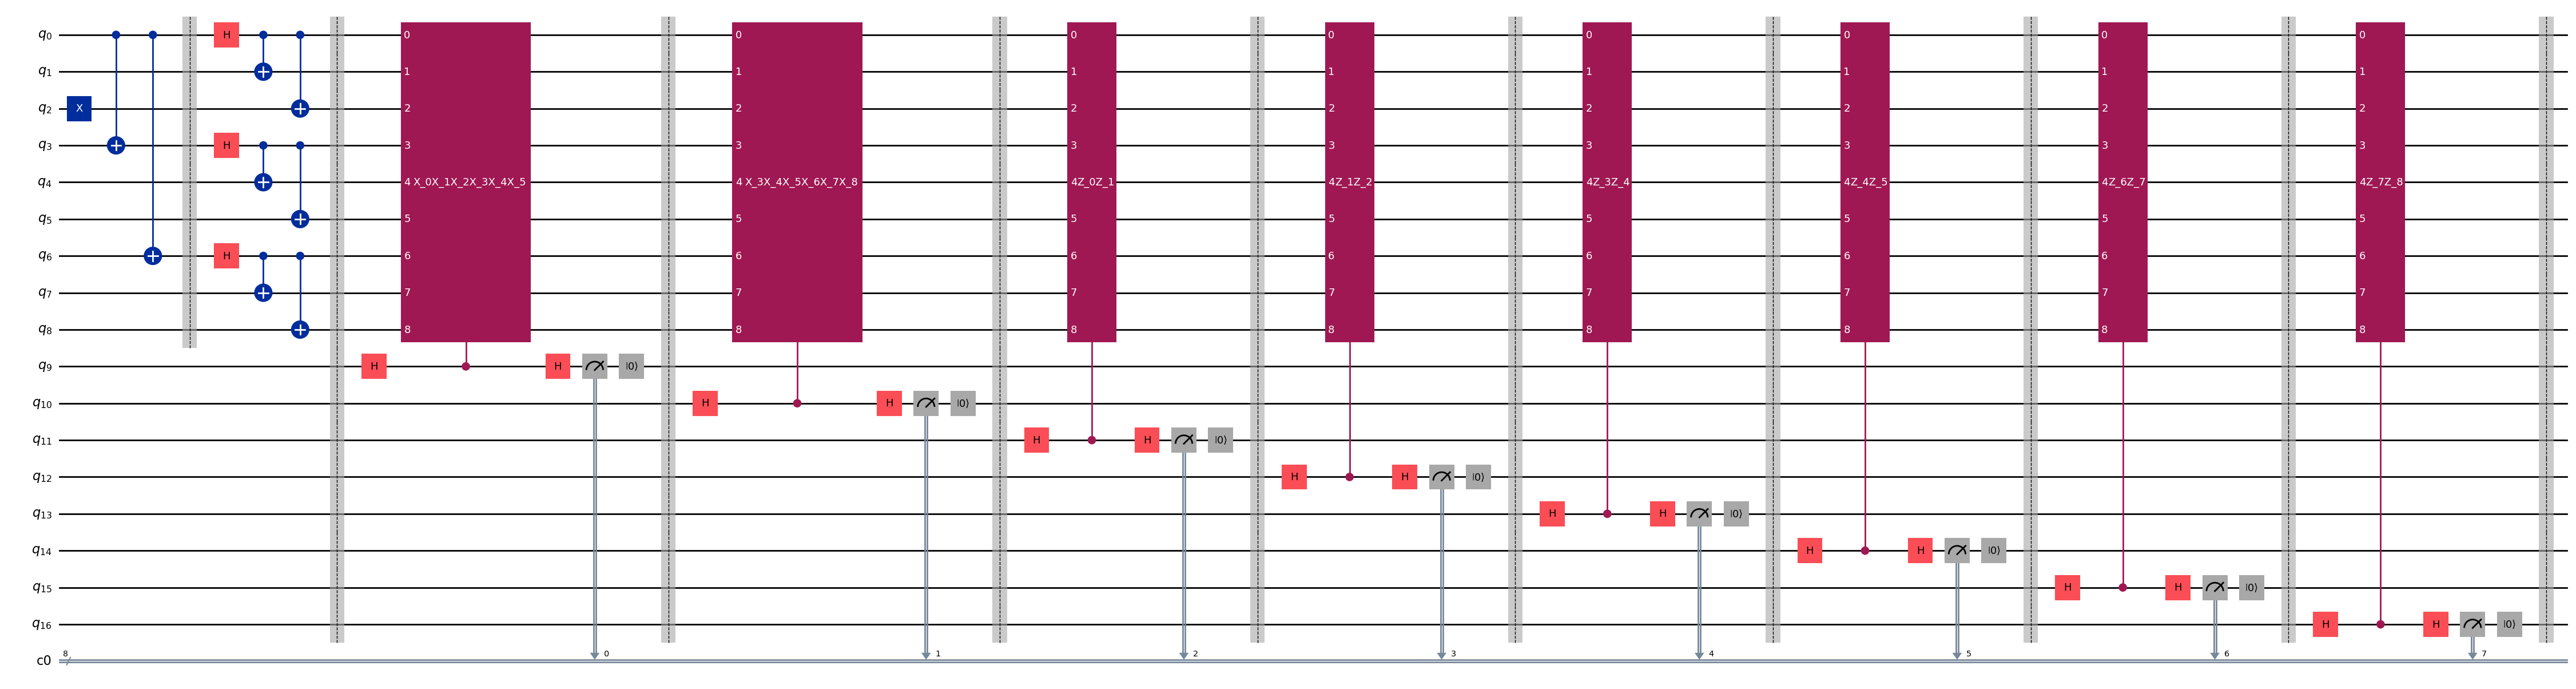

In [5]:
aer = AerSimulator()

sc = ShorCode()

qc = QuantumCircuit(9 + 8)
qc.x(2)
qc.compose(ShorCode().encoder(), inplace = True)
qc.barrier()
qc.compose(ShorCode().stabilizer_measurement_circuit(), inplace = True)

display(qc.draw('mpl', fold = -1))

res = aer.run(qc.decompose(), shots = 1000)

In [6]:
res.result().get_counts()

{'00001000': 1000}